# Demonstration of Quandl API

## Data and Inputs:

The data will use the following stocks in the portfolio:

- Apple
- Amazon
- Exelon Corporation 
- Nasdaq
- Royal Gold Inc.
<br>

**Training and Testing Data Period:** <br>
Start Date: July 1, 2015 <br>
End Date: Dec 31, 2018

# Set up the notebook
We will begin by importing all the necessary Python modules required to run the notebook.

In [261]:
%matplotlib inline

import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and Explore the Data
We will trading data, collected over the time period of:

**Start Date:** July 1, 2015 <br> 
**End Date:** Dec 31, 2018    
    
The cell below will download this data from the quandl API, giving you data in the form of a pandas dataframe.

In [262]:
start_date = "2015-7-1"
end_date = "2017-12-31"

In [263]:
dfAAPL = quandl.get("WIKI/AAPL", start_date="2015-7-1", end_date="2017-12-31")
dfAAPL = dfAAPL.rename(columns={'Adj. Close':'AAPL'})

dfAMZN = quandl.get("WIKI/AMZN", start_date="2015-7-1", end_date="2017-12-31")
dfAMZN = dfAMZN.rename(columns={'Adj. Close':'AMZN'})

dfEXC = quandl.get("WIKI/EXC", start_date="2015-7-1", end_date="2017-12-31")
dfEXC = dfEXC.rename(columns={'Adj. Close':'EXC'})

dfNDAQ = quandl.get("WIKI/NDAQ", start_date="2015-7-1", end_date="2017-12-31")
dfNDAQ = dfNDAQ.rename(columns={'Adj. Close':'NDAQ'})

dfRGLD = quandl.get("WIKI/RGLD", start_date="2015-7-1", end_date="2017-12-31")
dfRGLD = dfRGLD.rename(columns={'Adj. Close':'RGLD'})


# Pre-Process the Data

The /quandl dataframes have the following attributes:
* Date
* Open
* High
* Low
* Close
* Volume
* Ex-Dividend
* Split Ratio
* Adj. Open
* Adj. High
* Adj. Low
* Adj. Close
* Adj. Volume

Of all these columns, we will use only ***Adj. Close***. This is because the trading data is very volatile and 
changes several times within a day. Adjusted closing price factors a stock's value to reflect any corporate 
actions such as dividends, rights offerings and stock splits. For more information, [visit this post.](https://www.investopedia.com/terms/a/adjusted_closing_price.asp#:~:text=The%20adjusted%20closing%20price%20amends,detailed%20analysis%20of%20past%20performance.)

This is the reason why you will notice that each of the stock's adjusted price has been renamed to its ticker symbol in the cell above.

**Below, we will create a new DataFrame and join the portfolio value from the individual DataFrames above.**

In [264]:
start_date="2015-07-1"
end_date="2017-12-31"

Date = pd.date_range(start_date, end_date)

df=pd.DataFrame(index=Date)

df = pd.concat([dfAAPL, dfAMZN, dfEXC, dfNDAQ, dfRGLD], axis=1)
df = df.dropna()
df = df[['AAPL', 'AMZN', 'EXC', 'NDAQ', 'RGLD']]

df

,AAPL,AMZN,EXC,NDAQ,RGLD
Date,,,,,
2015-07-01,121.243068,437.39,29.107162,46.691199,58.987619
2015-07-02,121.089838,437.71,29.400710,47.093792,60.214716
2015-07-06,120.668456,436.04,29.299803,46.739127,61.282387
2015-07-07,120.371574,436.72,30.061194,46.815812,59.548025
2015-07-08,117.383593,429.70,29.905246,45.876428,59.678465
...,...,...,...,...,...
2017-12-22,175.010000,1168.36,39.010000,76.090000,86.560000
2017-12-26,170.570000,1176.76,38.810000,76.130000,87.650000
2017-12-27,170.600000,1182.26,38.990000,76.340000,86.730000


# Visualize the Data

We will now plot the data from the DataFrame that we created to visualize the progress.

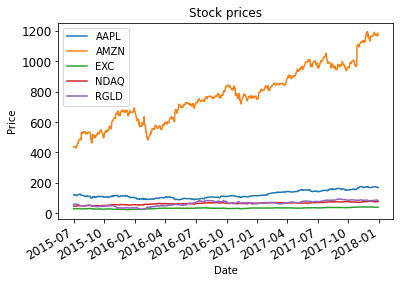

In [265]:
def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
plot_data(df)

# Normalize the Data

Since the stocks trade at significantly different prices, it is hard to make a fair comparison. We will make them all 
begin at one fair point so that the comparison is on an equal footing. We will achieve this using data normalization. We will normalize price data, so that each value begins at 1.

In [266]:
def normalize_data(df):
    df = df/df.iloc[0, :]
    return df
df = normalize_data(df)
df.head()

,AAPL,AMZN,EXC,NDAQ,RGLD
Date,,,,,
2015-07-01,1.000000,1.000000,1.000000,1.000000,1.000000
2015-07-02,0.998736,1.000732,1.010085,1.008622,1.020803
2015-07-06,0.995261,0.996914,1.006618,1.001026,1.038903
2015-07-07,0.992812,0.998468,1.032777,1.002669,1.009500
2015-07-08,0.968167,0.982418,1.027419,0.982550,1.011712


# Plot Normalized Data

On plotting this normalized data, we will find that the stocks movement is relatively closer together. Hence we can
make a fair comparison.

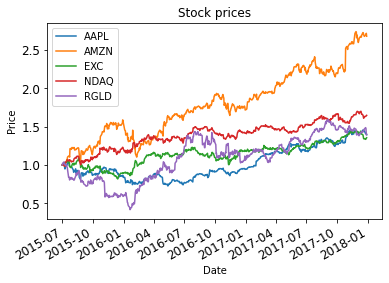

In [267]:
plot_data(df)